<a href="https://colab.research.google.com/github/bunny47xxx/AI/blob/main/2435775_SushanShrestha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

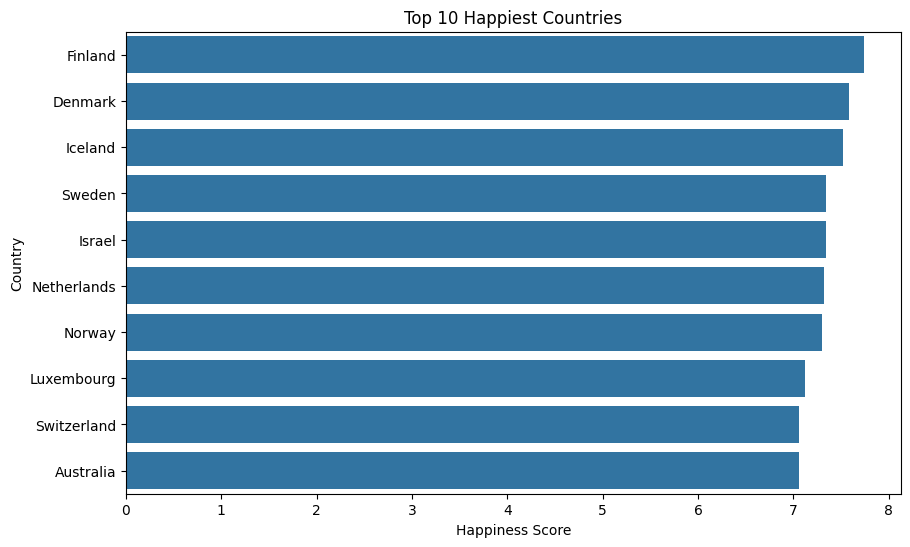

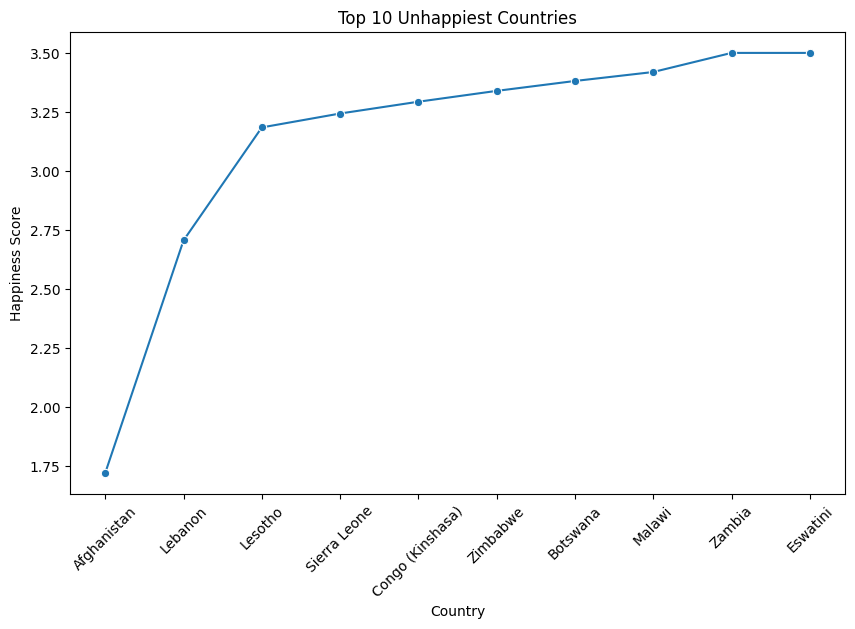

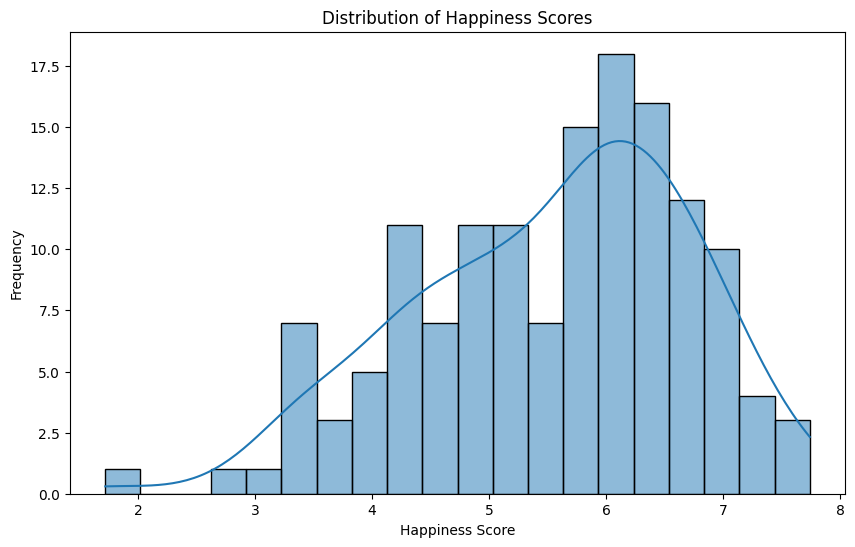

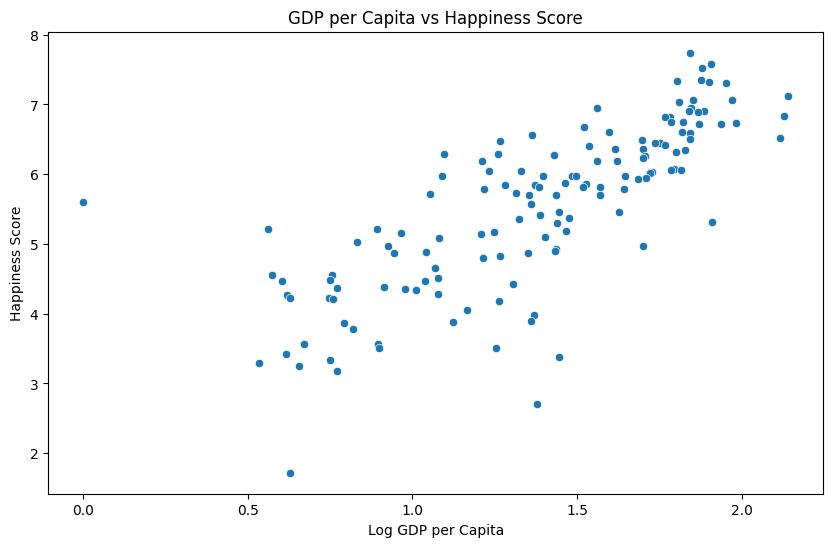

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/WHR-2024-5CS037 (1).csv')

# Display the first 10 rows of the dataset
print(data.head(10))

# Show the number of rows and columns
num_rows, num_cols = data.shape
print(f'Number of rows: {num_rows}, Number of columns: {num_cols}')

# Check the data types of each column
print(data.dtypes)

# Calculate basic statistics for the happiness score
mean_score = data['score'].mean()
median_score = data['score'].median()
std_score = data['score'].std()
print(f'Mean: {mean_score:.2f}, Median: {median_score:.2f}, Std Dev: {std_score:.2f}')

# Identify the countries with the highest and lowest happiness scores
highest_score_country = data.loc[data['score'].idxmax()]
lowest_score_country = data.loc[data['score'].idxmin()]
print(f'Highest Score: {highest_score_country["Country name"]} - {highest_score_country["score"]:.2f}')
print(f'Lowest Score: {lowest_score_country["Country name"]} - {lowest_score_country["score"]:.2f}')

# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Filter countries with scores greater than 7.5
high_score_countries = data[data['score'] > 7.5]
top_high_score_countries = high_score_countries.sort_values(by='Log GDP per capita', ascending=False).head(10)
print("Top countries with scores above 7.5:")
print(top_high_score_countries)

# Function to categorize happiness scores
def categorize_score(score):
    if score < 4:
        return 'Low'
    elif score <= 6:
        return 'Medium'
    else:
        return 'High'

# Apply the categorization function to create a new column
data['Happiness Category'] = data['score'].apply(categorize_score)

# Visualization: Top 10 Happiest Countries
plt.figure(figsize=(10, 6))
top_happiest = data.nlargest(10, 'score')
sns.barplot(x='score', y='Country name', data=top_happiest)
plt.title('Top 10 Happiest Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

# Visualization: Top 10 Unhappiest Countries
plt.figure(figsize=(10, 6))
top_unhappiest = data.nsmallest(10, 'score')
sns.lineplot(x='Country name', y='score', data=top_unhappiest, marker='o')
plt.title('Top 10 Unhappiest Countries')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

# Visualization: Distribution of Happiness Scores
plt.figure(figsize=(10, 6))
sns.histplot(data['score'], bins=20, kde=True)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

# Visualization: GDP per Capita vs Happiness Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=data)
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()
